In [1]:
from bulid_transformer_model import bulid_model
from data_loading import load_data
from sequence_generator import seq_generator
from experiment_filter import filter
import tensorflow as tf
from tensorflow.keras.layers import Layer,Dense,Input
import tensorflow as tf
import numpy as np 
import Affine_transformation 
import importlib
from new_affine_transformation import Af
from matplotlib import pyplot as plt
importlib.reload(Affine_transformation)
importlib.re




2023-11-16 17:06:27.203609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:06:27.436179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:06:27.445352: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 17:06:31.698033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<module 'Affine_transformation' from '/workspaces/mouse_visual_cortex_NN_modeling/Affine_transformation.py'>

In [3]:

experiments = filter('VISl',0.7)
(train_movie,train_trace,train_speed,eye_train),(val_movie,val_trace,val_speed,eye_val) = load_data(experiment_id=experiments[1],train_reliablity=0.4,test_reliablity=0)

(9000,) im here


In [7]:
t = seq_generator(train_movie,train_trace,train_speed,eye_train,delay =10)
p = next(t)[0][0]
a = np.array([0.7,-0.7,0,
              0.7,0.7,0])
a = np.expand_dims(a,0)
a = np.expand_dims(a,0)
a = np.repeat(a,3,0)
a = np.repeat(a,10,1).astype('float32')
#a = a.reshape((10,2,3)).astype('float32')
#y = Affine_transformation.Affine_transform()(p,a)




In [2]:
ini = Input((10,6))
ino = Input((10,100,100,1))
x = Af()(ino,ini)
m = tf.keras.Model([ini,ino],x)

In [3]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 100, 100, 1)]    0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 6)]              0         []                            
                                                                                                  
 af (Af)                     (None, None, 304, 608, 1)    0         ['input_2[0][0]',             
                                                                     'input_1[0][0]']             
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte

In [8]:
y = Af()(p,a)

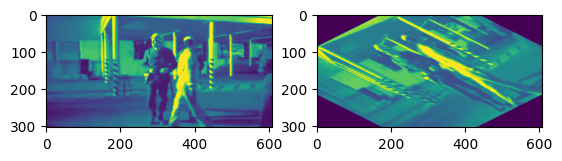

In [9]:
plt.subplot(1,2,1)
plt.imshow(p[0,0])
plt.subplot(1,2,2)
plt.imshow(y[0,0])


In [3]:
model = bulid_model(num_heads=4,spatial_layers=3,temporal_layers=2,delay=40,embed_dim=128,output_shape=8)

data = seq_generator(x = train_movie,y = train_trace,r = train_speed,delay = 40,shuffle=True,batch_size=10)
